<a href="https://colab.research.google.com/github/tinhb92/relax_ml/blob/master/entropy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt
import tensorflow as tf
import seaborn as sns
sns.set()

In [0]:
def kl_divergence(p, q):
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

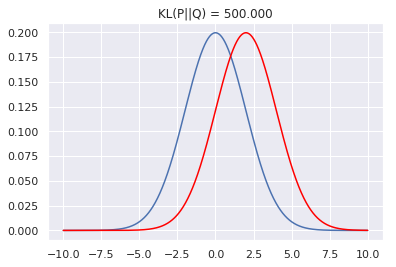

In [3]:
x = np.arange(-10, 10, 0.001)
p = norm.pdf(x, 0, 2)
q = norm.pdf(x, 2, 2)
plt.title('KL(P||Q) = %1.3f' % kl_divergence(p, q))
plt.plot(x, p)
plt.plot(x, q, c='red')

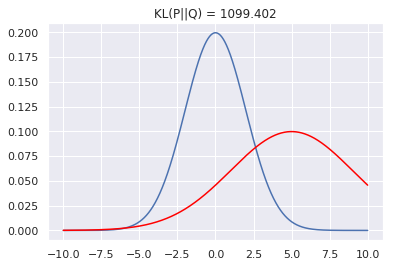

In [4]:
q = norm.pdf(x, 5, 4)
plt.title('KL(P||Q) = %1.3f' % kl_divergence(p, q))
plt.plot(x, p)
plt.plot(x, q, c='red')

In [7]:
def cross_entropy(predictions, targets, epsilon=1e-12):
    """
    Computes cross entropy between targets (encoded as one-hot vectors)
    and predictions. 
    Input: predictions (N, k) ndarray
           targets (N, k) ndarray        
    Returns: scalar
    """
    predictions = np.clip(predictions, epsilon, 1. - epsilon)
    N = predictions.shape[0]
    ce = -np.sum(targets*np.log(predictions+1e-9))/N
    return ce

predictions = np.array([[0.25,0.25,0.25,0.25],
                        [0.01,0.01,0.01,0.96]])
targets = np.array([[0,0,0,1],
                   [0,0,0,1]])
ans = 0.71355817782  #Correct answer
x = cross_entropy(predictions, targets)
print(np.isclose(x,ans))

True


In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [9]:
batch_size, n_classes = 5, 3
x = torch.randn(batch_size, n_classes)
x.shape

torch.Size([5, 3])

In [10]:
target = torch.randint(n_classes, size=(batch_size,), dtype=torch.long)
target

tensor([2, 0, 1, 0, 0])

softmax + negative likelihood

In [11]:
def softmax(x): return x.exp() / (x.exp().sum(-1)).unsqueeze(-1)
def nl(input, target): return -input[range(target.shape[0]), target].log().mean()

pred = softmax(x)
loss=nl(pred, target)
loss

tensor(1.2857)

While mathematically equivalent to log(softmax(x)), doing these two operations separately is slower, and numerically unstable. This function uses an alternative formulation to compute the output and gradient correctly.

In [12]:
def log_softmax(x): return x - x.exp().sum(-1).log().unsqueeze(-1)
def nll(input, target): return -input[range(target.shape[0]), target].mean()

pred = log_softmax(x)
loss = nll(pred, target)
loss

tensor(1.2857)

In [13]:
pred = F.log_softmax(x, dim=-1)
loss = F.nll_loss(pred, target)
loss

tensor(1.2857)

In [14]:
F.cross_entropy(x, target)


tensor(1.2857)